In [1]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

import MySQLdb
import sqlalchemy

from sqlalchemy.orm import sessionmaker




from urllib import parse

# matplotlib.rcParams['font.family'] = 'NanumGothic'  # 'Malgun Gothic' (Windows 기본 한글 폰트)
# matplotlib.rcParams['axes.unicode_minus'] = False  # 음수 기호 깨짐 방지

# import matplotlib.font_manager as fm

# font_path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
# prop = fm.FontProperties(fname=font_path)

# # 사용 가능한 폰트 목록 확인
# for font in fm.fontManager.ttflist:
#     if font.name == 'NanumGothic':
#         print(font.name)
# 
# matplotlib.rcParams['font.family'] = 'Noto Sans CJK KR'  

In [2]:
# connect DB
config_ = {
    'user' : 'team2',
    'passwd' : parse.quote_plus('Encore_team2@'),
    'host' : '222.112.208.67',
    'port' : '13306',
    'DB' : 'team2'
}
engine = sqlalchemy.create_engine(
    f"mysql://{config_['user']}:{config_['passwd']}@{config_['host']}:{config_['port']}/{config_['DB']}",
    echo=True
)

try:
    with engine.connect() as connection:
        print("Database connection successful!")
except Exception as e:
    print(f"Database connection failed: {e}")

2024-11-14 11:40:21,036 INFO sqlalchemy.engine.Engine SELECT DATABASE()
2024-11-14 11:40:21,037 INFO sqlalchemy.engine.Engine [raw sql] ()
2024-11-14 11:40:21,048 INFO sqlalchemy.engine.Engine SELECT @@sql_mode
2024-11-14 11:40:21,048 INFO sqlalchemy.engine.Engine [raw sql] ()
2024-11-14 11:40:21,055 INFO sqlalchemy.engine.Engine SELECT @@lower_case_table_names
2024-11-14 11:40:21,055 INFO sqlalchemy.engine.Engine [raw sql] ()
Database connection successful!


In [3]:
query = "SELECT * FROM sigungu"
df = pd.read_sql(query, engine)

query = "SELECT * FROM gender_age"
ga_df = pd.read_sql(query, engine)

2024-11-14 11:40:23,645 INFO sqlalchemy.engine.Engine BEGIN (implicit)
2024-11-14 11:40:23,646 INFO sqlalchemy.engine.Engine DESCRIBE `team2`.`SELECT * FROM sigungu`
2024-11-14 11:40:23,647 INFO sqlalchemy.engine.Engine [raw sql] ()
2024-11-14 11:40:23,663 INFO sqlalchemy.engine.Engine SELECT * FROM sigungu
2024-11-14 11:40:23,664 INFO sqlalchemy.engine.Engine [raw sql] ()
2024-11-14 11:40:23,815 INFO sqlalchemy.engine.Engine ROLLBACK
2024-11-14 11:40:23,832 INFO sqlalchemy.engine.Engine BEGIN (implicit)
2024-11-14 11:40:23,833 INFO sqlalchemy.engine.Engine DESCRIBE `team2`.`SELECT * FROM gender_age`
2024-11-14 11:40:23,833 INFO sqlalchemy.engine.Engine [raw sql] ()
2024-11-14 11:40:23,853 INFO sqlalchemy.engine.Engine SELECT * FROM gender_age
2024-11-14 11:40:23,853 INFO sqlalchemy.engine.Engine [raw sql] ()
2024-11-14 11:40:23,926 INFO sqlalchemy.engine.Engine ROLLBACK


/tmp/ipykernel_16609/268738318.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp['date'] = pd.to_datetime(tmp['date'], format='%Y%m')
/tmp/ipykernel_16609/268738318.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp['date'] = pd.to_datetime(tmp['date'], format='%Y%m')
/tmp/ipykernel_16609/268738318.py:53: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https

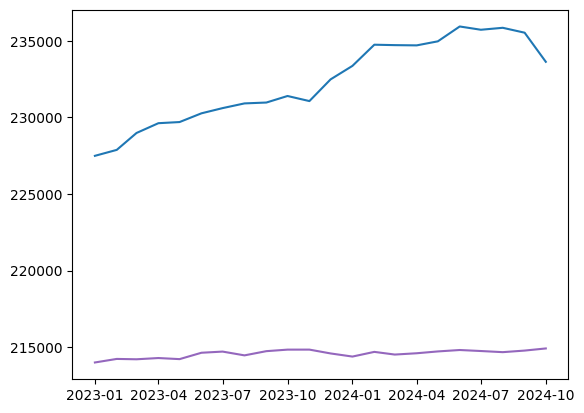

In [6]:
sigungu = df.drop(
    columns=['id']
)
gungu = '강남'
cartype = '승용'

sigungu['date'] = (sigungu['year'].astype(str) + sigungu['month'].astype(str).str.zfill(2)).astype(int)

tmp = sigungu[(sigungu['district_gugun'].str.contains(gungu)) & (sigungu['car_type'] == cartype)]
# tmp['date'] = pd.to_datetime(tmp['date'])
tmp['date'] = pd.to_datetime(tmp['date'], format='%Y%m')

# tmp[['date', 'num']].sort_values(by='date', ascending=True).plot(
#     x='date', y='num', kind='line', marker='o', #linestyle='None'
#     title=f"registration number",
#     # fontproperties=prop
#      label='Gangnam'
# )

x1 = tmp[['date', 'num']].sort_values(by='date', ascending=True).copy()
# print(x1.tail())
x1 = x1.rename(
    columns={
        'num' : 'y1'
    }
)

gungu = '송파'
cartype = '승용'

sigungu['date'] = (sigungu['year'].astype(str) + sigungu['month'].astype(str).str.zfill(2)).astype(int)

tmp = sigungu[(sigungu['district_gugun'].str.contains(gungu)) & (sigungu['car_type'] == cartype)]
# tmp['date'] = pd.to_datetime(tmp['date'])
tmp['date'] = pd.to_datetime(tmp['date'], format='%Y%m')

x2 = tmp[['date', 'num']].sort_values(by='date', ascending=True).copy()

x2 = x2.rename(
    columns={
        'num' : 'y2'
    }
)


gungu = '서초'
cartype = '승용'

sigungu['date'] = (sigungu['year'].astype(str) + sigungu['month'].astype(str).str.zfill(2)).astype(int)

tmp = sigungu[(sigungu['district_gugun'].str.contains(gungu)) & (sigungu['car_type'] == cartype)]
# tmp['date'] = pd.to_datetime(tmp['date'])
tmp['date'] = pd.to_datetime(tmp['date'], format='%Y%m')

x3 = tmp[['date', 'num']].sort_values(by='date', ascending=True).copy()

x3 = x3.rename(
    columns={
        'num' : 'y3'
    }
)


X = pd.concat(
    [x1, x2, x3], axis=1
)

# print(x.tail())

plt.plot(
    X['date'],
    X['y1'],
    label='First'
)

plt.plot(
    X['date'],
    X['y2'],
    label='Second'
)

# plt.plot(
#     X['date'],
#     X['y3'],
#     label='Gangnam'
# )

# tmp[['date', 'num']].sort_values(by='date', ascending=True).plot(
#     x='date', y='num', kind='line', marker='o', #linestyle='None'
#     title=f"registration number",
#     # fontproperties=prop
#      label='Geumcheon'
# )


# plt.legend()
plt.show()

In [27]:
X

,date,y1,date,y2
2572,2023-01-01,41556.0,NaT,NaN
2823,2023-02-01,41574.0,NaT,NaN
3074,2023-03-01,41616.0,NaT,NaN
3325,2023-04-01,41598.0,NaT,NaN
3576,2023-05-01,41620.0,NaT,NaN
...,...,...,...,...
2334,NaT,NaN,2024-10-01,34326.0
2344,NaT,NaN,2024-10-01,55142.0
2354,NaT,NaN,2024-10-01,71788.0
2364,NaT,NaN,2024-10-01,85984.0


In [4]:
# disconnect DB
engine.dispose()